### Tutorial 1

In [49]:
import matplotlib.pyplot as plt
import numpy as np

### 1 - env/ex – Think of application.
Think of a (preferably creative) application of reinforcement learning.
Specify the states, actions, and rewards as well as what is needed to satisfy the Markov property

One application would be agents that generate adversarial examples based on output label probabilities of CNNs for image classification task. Goal is to add noise to input image so that CNN predicts wrong label, but we need to reduce the amount of noise needed for classification, so the modification of image isn't visible for the human eye.

States are different noisings (noise maps).

Actions are adding more noise or removing some noise.

Rewards are generated based on (mis)classification.

Markov property is satisfied because in each state every previous perturbation modification is contained in current perturbation (noise map). 

### 2 - env/counterex – Goal-directed learning task that is not an MDP.
Try to find a goal-directed learning task that cannot be represented by a Markov decision process.


Whatever game (for example with cards) that gives some bonus points based on chain of thrown cards in previous turns. For example, if a player throws 3 cards in a row of same number or same shape. On the start of the game deck of cards splits into n smaller decks (if we have n people playing) and each turn every player has 5 cards in hand (one turn - draws one card and throws one on the field). The goal is to optimize to get higher score. 

### 3 - as – 𝜖-greedy action selection.
Assume that 𝜖-greedy action selection is used.
- (a) Suppose |𝒜| = 4 and 𝜖 = 0.2. When using 𝜖-greedy action selection, what is the probability that the greedy action is selected?
- (b) Which value of 𝜖 would achieve a probability of 70% of selecting the greedy action?
- (c) Generalize the formula for calculating the probability of selecting the greedy action in 𝜖-greedy action selection for any |𝒜| and any 𝜖.

a)
\begin{equation*}
P(greedy) = P(greedy|greedy) + P(greedy|random) = 1 - \epsilon + \epsilon \frac{1}{|A|} = 0.8 + 0.2 * \frac{1}{4} = 0.85
\end{equation*}

b)
\begin{align*}
P(greedy) = 0.7 &= 1 - \epsilon + \epsilon*\frac{1}{|A|} \\
        &= 1 - \epsilon \frac{|A| - 1}{|A|} \\
         0.7 &= 1 - \epsilon \frac{3}{4} \\ 
        0.3 &= 0.75 \epsilon \\ 
        \epsilon &= 0.4 \\
\end{align*}

c)
\begin{equation*}
P(greedy) = 1 - \epsilon + \epsilon \frac{1}{|A|} = 1 - \epsilon \frac{|A| - 1}{|A|} 
\end{equation*}

### 4 - sts/h – Harmonic step sizes.

Show that the step sizes
\begin{equation*}
\alpha_n := \frac{1}{an + b}, \; a,b \in \mathbf{R}
\end{equation*}

(where $a \in R^+$, $b \in R$ are chosen such that $an + b \neq 0$) satisfy the convergence conditions

\begin{equation*}
\sum_{n = 1}^\infty \alpha_n = \infty
\end{equation*}

\begin{equation*}
\sum_{n = 1}^\infty \alpha_n^2 < \infty
\end{equation*}



For the both of conditions we can use the comparison test:
If $a_n = O(b_n)$ and $b_n = O(a_n)$ (in other words $a_n \sim b_n$), then if $\lim_{n \rightarrow \infty} \frac{a_n}{b_n} = K$, where $0 < K < \infty$, series of $a_n$ and $b_n$ behave the same as $n \rightarrow \infty$.

In first part we will take, $a_n = \frac{1}{n}$ and $b_n = \frac{1}{an + b}$:

\begin{equation*}
\lim_{n \rightarrow \infty}\frac{\frac{1}{n}}{\frac{1}{an + b}} = a, \;\; 0 < a < \infty
\end{equation*}

So we know that $b_n$ (our $\alpha_n$) will diverge if $a_n$ diverges, and we know that series $a_n = \frac{1}{n}$ diverge. 

In the second part, We will take $a_n = \frac{1}{n^2}$ and $b_n = \frac{1}{(an + b)^2}$ 

\begin{equation*}
\lim_{n \rightarrow \infty}\frac{\frac{1}{n^2}}{\frac{1}{(an + b)^2}} = a^2, \;\; 0 < a^2 < \infty
\end{equation*}

So we know that $b_n$ (our $\alpha_n$) will converge if $a_n$ converges, and we know that series $a_n = \frac{1}{n^2}$ converge (with integral test). 

### 5 - sts/u – Unbiased step sizes.
We use the iteration:
\begin{align*}
Q_1 &\in \mathbf{R}, \\
Q_{n + 1} &:= Q_n + \alpha_n(R_n − Q_n), n \geq 1,
\end{align*}
to estimate Q_n using R_n, where
\begin{equation*}
\alpha_n := \frac{\alpha}{\beta_n}, \; \alpha \in (0, 1)
\end{equation*}
and
\begin{align*}
\beta_0 &:= 0 \\
\beta_n &:= \beta_{n - 1} + \alpha(1 - \beta_{n - 1}), \; n \geq 1
\end{align*}
Show that the iteration for $Q_n$ above yields an exponential recency weighted average without initial bias (i.e., the $Q_n$ do not depend on the initial value $Q_1$).

Let's unfold $Q_{n + 1}$:

\begin{align*}
Q_{n + 1} &= Q_n + \alpha_n(R_n - Q_n) = \alpha_n R_n + (1 - \alpha_n)Q_n \\
          &= \alpha_n R_n + (1 - \alpha_n)(\alpha_{n - 1}R_{n - 1} + (1 - \alpha_{n - 1})Q_{n - 1}) \\
          &= \alpha_n R_n + (1 - \alpha_n)\alpha_{n - 1}R_{n - 1} + (1 - \alpha_n)(1 - \alpha_{n - 1})Q_{n - 1} \\
          & ... \\
          &= \sum_{i = n}^1 \alpha_i R_i \prod_{j = n}^{i + 1} (1 - \alpha_j) + Q_1\prod_{i = n}^{1}(1 - \alpha_i)
\end{align*}

Last term in product with $Q_1$ term is (1 - $\alpha_1$):
\begin{equation*}
1 - \alpha_1 = 1 - \frac{\alpha}{\beta_1} = 1 - \frac{\alpha}{\beta_0 + \alpha(1 - \beta_0)} = 1 - \frac{\alpha}{\alpha} = 0
\end{equation*}

Therefore, whole second term $Q_1 \prod_{i = n}^{1}(1 - \alpha_i)$ is 0 and $Q_n$ is not dependant on $Q_1$

### 6 - mab/eps – Multi-armed bandits with 𝜖-greedy action selection (programming).
You play against a 10-armed bandit, where at the beginning of each episode the true value $q_*(a), a \in \{1, … , 10\}$, of each of the 10 actions
is chosen to be normally distributed with mean zero and unit variance. The rewards after choosing action/bandit a are normally distributed with mean $q_*(a)$ and unit variance. Using the simple bandit algorithm and $\epsilon$-greedy action selection, you have 1000 time steps or tries in each episode to maximize the average reward starting from zero knowledge about the bandits. Which value of $\epsilon$ maximizes the average reward? Which value of $\epsilon$ maximizes the percentage of optimal actions taken?

Defining function for $\epsilon$-greedy multi-armed bandit:

In [50]:
def eps_greedy_multi_armed_bandit(eps, q_true):

    time_steps = 1000
    q = np.zeros(10)
    n = np.zeros(10)
    reward = np.zeros(time_steps)
    optimal_actions = np.zeros(time_steps)

    for step in range(time_steps):

        if np.random.rand() < eps:
            selected = np.random.randint(10)
        else:
            selected = np.argmax(q)
        
        n[selected] += 1
        curr_reward = np.random.normal(q_true[selected], 1)
        q[selected] += (1 / n[selected]) * (curr_reward - q[selected])
        optimal_actions[step] = selected == np.argmax(q_true)
        reward[step] = curr_reward

    return optimal_actions, reward

Tryout

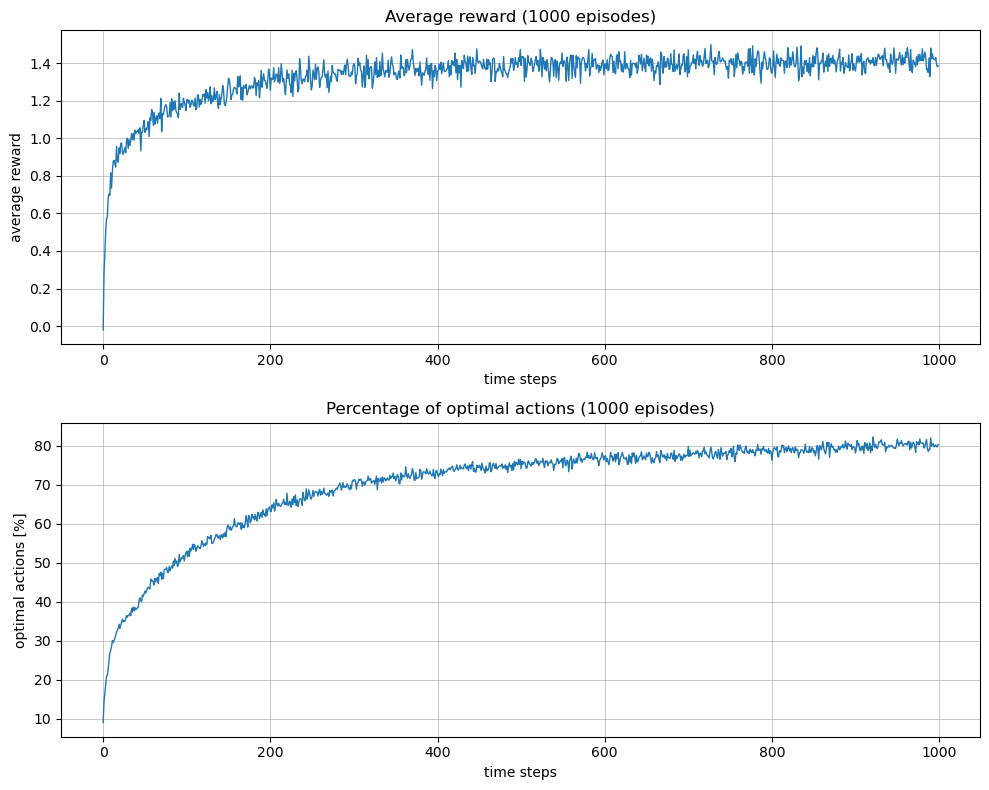

In [51]:
eps = 0.1
episodes = 1000
time_steps = 1000

optimal_actions = np.zeros((episodes, time_steps))
rewards = np.zeros((episodes, time_steps))

for episode in range(episodes):

    q_true = np.random.normal(0, 1, 10)
    optimal_actions[episode, :], rewards[episode, :] = eps_greedy_multi_armed_bandit(eps, q_true)

optimal_actions_per = optimal_actions.mean(axis = 0)
avg_reward = rewards.mean(axis = 0)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
axes = ax.flatten()

axes[0].plot(np.arange(0, time_steps), avg_reward, linewidth=1)
axes[0].set_ylabel('average reward')
axes[0].set_xlabel('time steps')
axes[0].set_title(f'Average reward ({episodes} episodes)')
axes[0].grid(True, linewidth=0.5)

axes[1].plot(np.arange(0, time_steps), 100*optimal_actions_per, linewidth=1)
axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('time steps')
axes[1].set_title(f'Percentage of optimal actions ({episodes} episodes)')
axes[1].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

Different $\epsilon$ values

In [52]:
time_steps = 1000
episodes = 1000
epsilon_vect = [0, 0.01, 0.1, 0.25, 0.5]

optimal_actions_per = np.zeros((len(epsilon_vect), time_steps))
avg_reward = np.zeros((len(epsilon_vect), time_steps))

for idx, epsilon in enumerate(epsilon_vect):
    
    optimal_actions = np.zeros((episodes, time_steps))
    rewards = np.zeros((episodes, time_steps))
    
    for episode in range(episodes): 
    
        q_true = np.random.normal(0, 1, 10)
        optimal_actions[episode, :], rewards[episode, :] = eps_greedy_multi_armed_bandit(epsilon, q_true)

    optimal_actions_per[idx, :] = optimal_actions.mean(axis = 0)
    avg_reward[idx, :] = rewards.mean(axis = 0)
    

We summarize a complete learning curve by its average value over the 1000 steps, to get the performance with given $\epsilon$

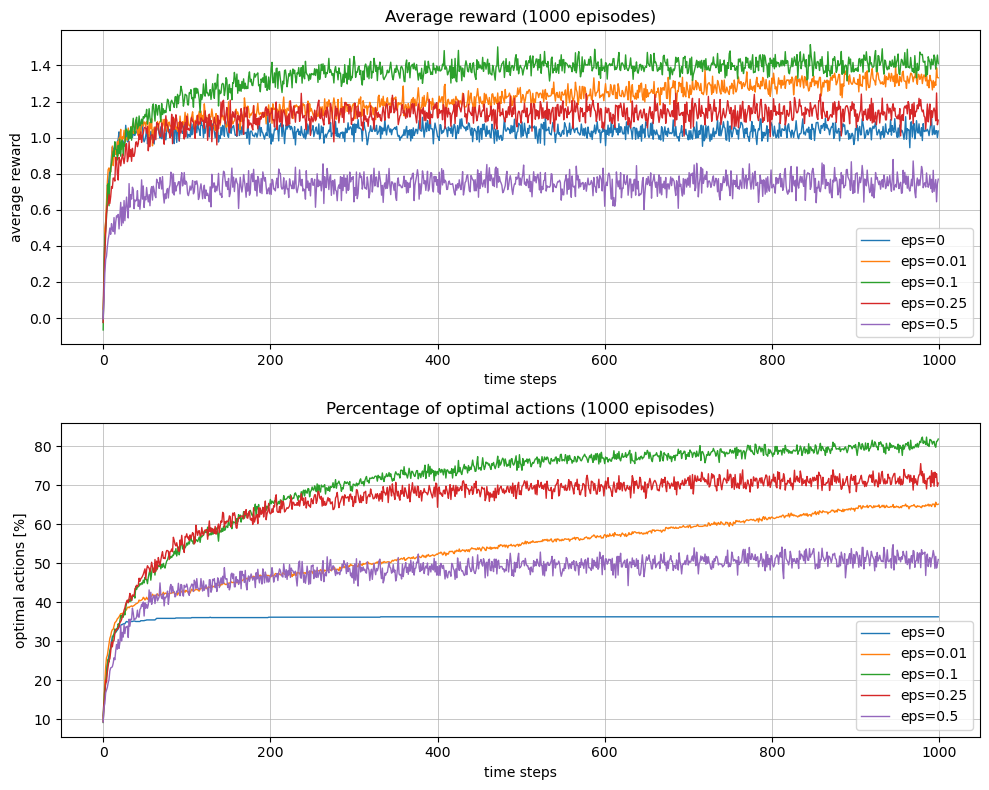

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
axes = ax.flatten()

axes[0].set_ylabel('average reward')
axes[0].set_xlabel('time steps')
axes[0].set_title(f'Average reward ({episodes} episodes)')
axes[0].grid(True, linewidth=0.5)

axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('time steps')
axes[1].set_title(f'Percentage of optimal actions ({episodes} episodes)')
axes[1].grid(True, linewidth=0.5)

auc_reward = np.zeros(len(epsilon_vect))
auc_optimal_actions = np.zeros(len(epsilon_vect))

for idx, epsilon in enumerate(epsilon_vect):

    axes[0].plot(np.arange(0, time_steps), avg_reward[idx, :], linewidth=1, label=f'eps={epsilon}')
    axes[1].plot(np.arange(0, time_steps), 100*optimal_actions_per[idx, :], linewidth=1, label=f'eps={epsilon}')

    auc_reward[idx] = avg_reward[idx, :].mean()
    auc_optimal_actions[idx] = 100*optimal_actions_per[idx, :].mean()    

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

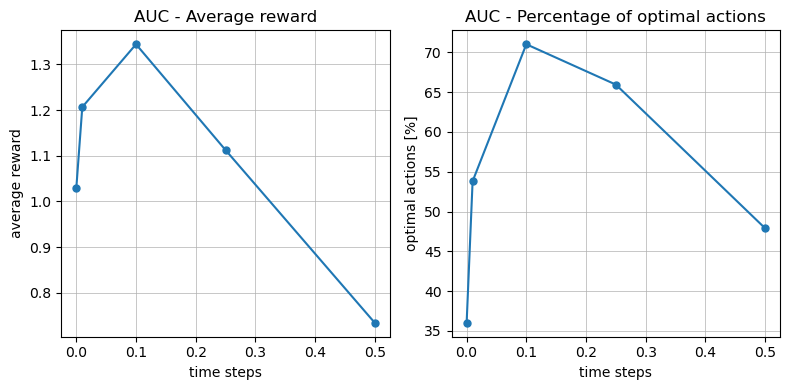

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
axes = ax.flatten()

axes[0].set_ylabel('average reward')
axes[0].set_xlabel('time steps')
axes[0].set_title(f'AUC - Average reward')
axes[0].grid(True, linewidth=0.5)

axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('time steps')
axes[1].set_title(f'AUC - Percentage of optimal actions')
axes[1].grid(True, linewidth=0.5)

axes[0].plot(epsilon_vect, auc_reward, marker='o', markersize=5)
axes[1].plot(epsilon_vect, auc_optimal_actions, marker='o', markersize=5)

plt.tight_layout()
plt.show()

### 7 - mab/ucb – Multi-armed bandits with upper-confidence-bound action selection (programming).
This exercise is the same as in Exercise mab/eps, but now the actions
\begin{equation*}
A_t := argmax_{a} (Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}})
\end{equation*}

are selected according to the upper-confidence bound. Which value of c yields the largest average reward?

In [55]:
def ucb_multi_armed_bandit(c, q_true):

    time_steps = 1000
    q = np.zeros(10)
    n = np.zeros(10)
    reward = np.zeros(time_steps)
    optimal_actions = np.zeros(time_steps)

    for step in range(time_steps):

        ucb_selection = q + c * np.sqrt(np.log(step + 1)/(n + 1e-9)) # overcome division by 0
        selected = np.argmax(ucb_selection)
        
        n[selected] += 1
        curr_reward = np.random.normal(q_true[selected], 1)
        q[selected] += (1 / n[selected]) * (curr_reward - q[selected])
        optimal_actions[step] = selected == np.argmax(q_true)
        reward[step] = curr_reward

    return optimal_actions, reward

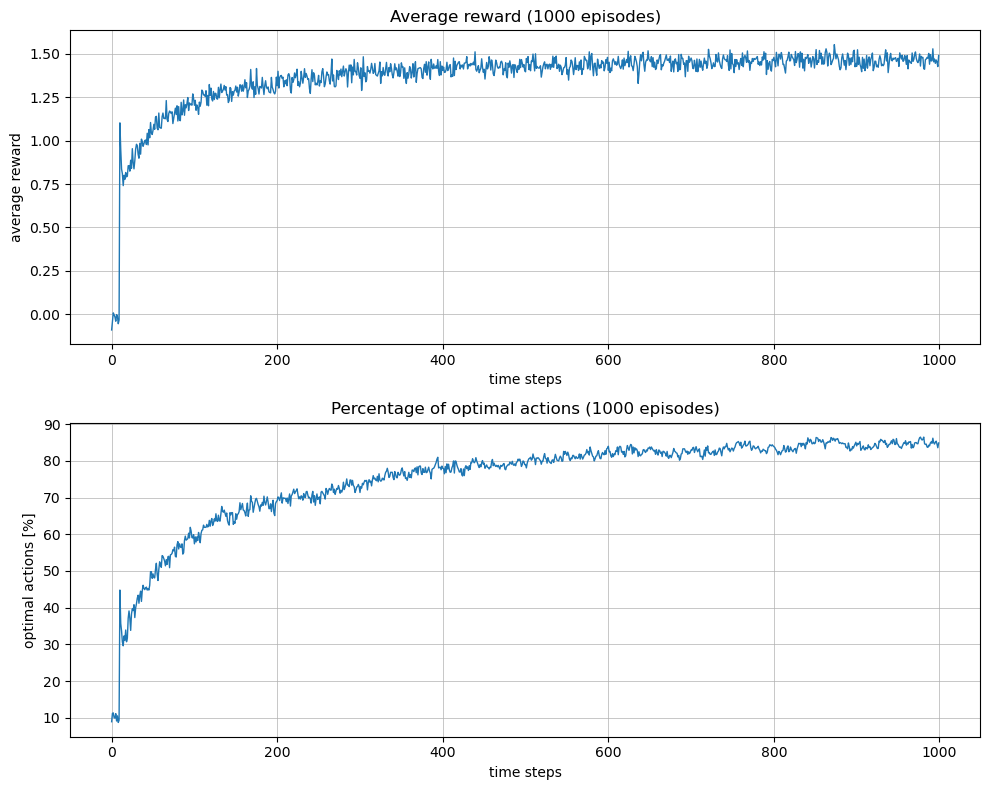

In [56]:
c = 2
episodes = 1000
time_steps = 1000

optimal_actions = np.zeros((episodes, time_steps))
rewards = np.zeros((episodes, time_steps))

for episode in range(episodes):

    q_true = np.random.normal(0, 1, 10)
    optimal_actions[episode, :], rewards[episode, :] = ucb_multi_armed_bandit(c, q_true)

optimal_actions_per = optimal_actions.mean(axis = 0)
avg_reward = rewards.mean(axis = 0)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
axes = ax.flatten()

axes[0].plot(np.arange(0, time_steps), avg_reward, linewidth=1)
axes[0].set_ylabel('average reward')
axes[0].set_xlabel('time steps')
axes[0].set_title(f'Average reward ({episodes} episodes)')
axes[0].grid(True, linewidth=0.5)

axes[1].plot(np.arange(0, time_steps), 100*optimal_actions_per, linewidth=1)
axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('time steps')
axes[1].set_title(f'Percentage of optimal actions ({episodes} episodes)')
axes[1].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

In [58]:
time_steps = 1000
episodes = 1000
c_vect = [0, 0.01, 0.1, 0.25, 0.5, 1, 2]

optimal_actions_per = np.zeros((len(c_vect), time_steps))
avg_reward = np.zeros((len(c_vect), time_steps))

for idx, c in enumerate(c_vect):
    
    optimal_actions = np.zeros((episodes, time_steps))
    rewards = np.zeros((episodes, time_steps))
    
    for episode in range(episodes): 
    
        q_true = np.random.normal(0, 1, 10)
        optimal_actions[episode, :], rewards[episode, :] = ucb_multi_armed_bandit(c, q_true)

    optimal_actions_per[idx, :] = optimal_actions.mean(axis = 0)
    avg_reward[idx, :] = rewards.mean(axis = 0)

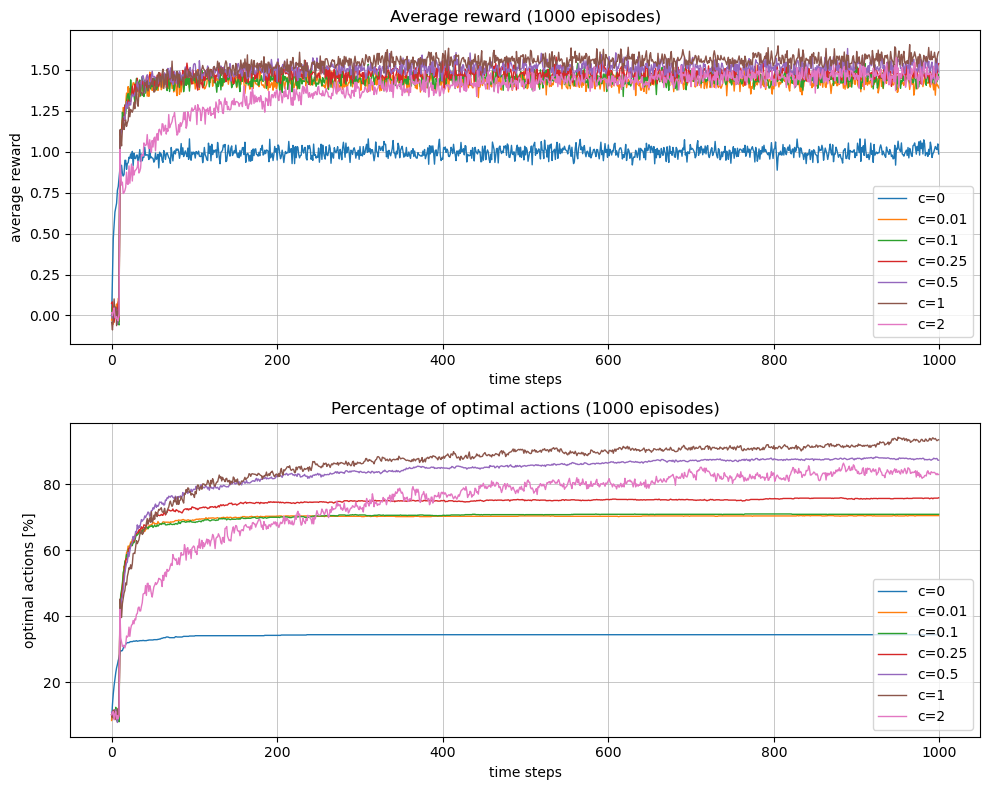

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
axes = ax.flatten()

axes[0].set_ylabel('average reward')
axes[0].set_xlabel('time steps')
axes[0].set_title(f'Average reward ({episodes} episodes)')
axes[0].grid(True, linewidth=0.5)

axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('time steps')
axes[1].set_title(f'Percentage of optimal actions ({episodes} episodes)')
axes[1].grid(True, linewidth=0.5)

auc_reward = np.zeros(len(c_vect))
auc_optimal_actions = np.zeros(len(c_vect))

for idx, c in enumerate(c_vect):

    axes[0].plot(np.arange(0, time_steps), avg_reward[idx, :], linewidth=1, label=f'c={c}')
    axes[1].plot(np.arange(0, time_steps), 100*optimal_actions_per[idx, :], linewidth=1, label=f'c={c}')

    auc_reward[idx] = avg_reward[idx, :].mean()
    auc_optimal_actions[idx] = 100*optimal_actions_per[idx, :].mean()    

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

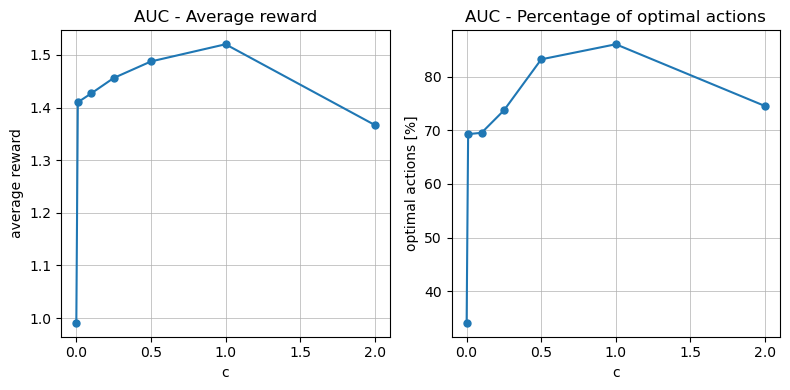

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
axes = ax.flatten()

axes[0].set_ylabel('average reward')
axes[0].set_xlabel('c')
axes[0].set_title(f'AUC - Average reward')
axes[0].grid(True, linewidth=0.5)

axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('c')
axes[1].set_title(f'AUC - Percentage of optimal actions')
axes[1].grid(True, linewidth=0.5)

axes[0].plot(c_vect, auc_reward, marker='o', markersize=5)
axes[1].plot(c_vect, auc_optimal_actions, marker='o', markersize=5)

plt.tight_layout()
plt.show()

### 8 - mab/softmax – Multi-armed bandits with soft-max action selection (programming).

This exercise is the same as Exercise mab/eps, but now the actions $A_t \in \mathcal{A} = \{1, ..., |\mathcal{A}|\}$ are selected with probability
\begin{equation*}
\mathbb{P}[a] = \frac{e^{\frac{Q_t(a)}{\tau}}}{\sum_{i = 1}^{|\mathcal{A}|}e^{\frac{Q_t(i)}{\tau}}},
\end{equation*}
where the parameter $\tau$ is called the temperature. This probability distribution is called the soft-max or Boltzmann distribution.

What are the effects of low and high temperatures, i.e., how does the temperature influence the probability distribution all else being equal?
Which value of $\tau$ yields the largest average reward?

In [69]:
def softmax_multi_armed_bandit(tau, q_true):

    time_steps = 1000
    q = np.zeros(10)
    n = np.zeros(10)
    reward = np.zeros(time_steps)
    optimal_actions = np.zeros(time_steps)

    for step in range(time_steps):

        probabilities = np.exp(q/tau) / np.sum(np.exp(q/tau)) # overcome division by 0
        selected = np.random.choice(len(q), p = probabilities)
        
        n[selected] += 1
        curr_reward = np.random.normal(q_true[selected], 1)
        q[selected] += (1 / n[selected]) * (curr_reward - q[selected])
        optimal_actions[step] = selected == np.argmax(q_true)
        reward[step] = curr_reward

    return optimal_actions, reward

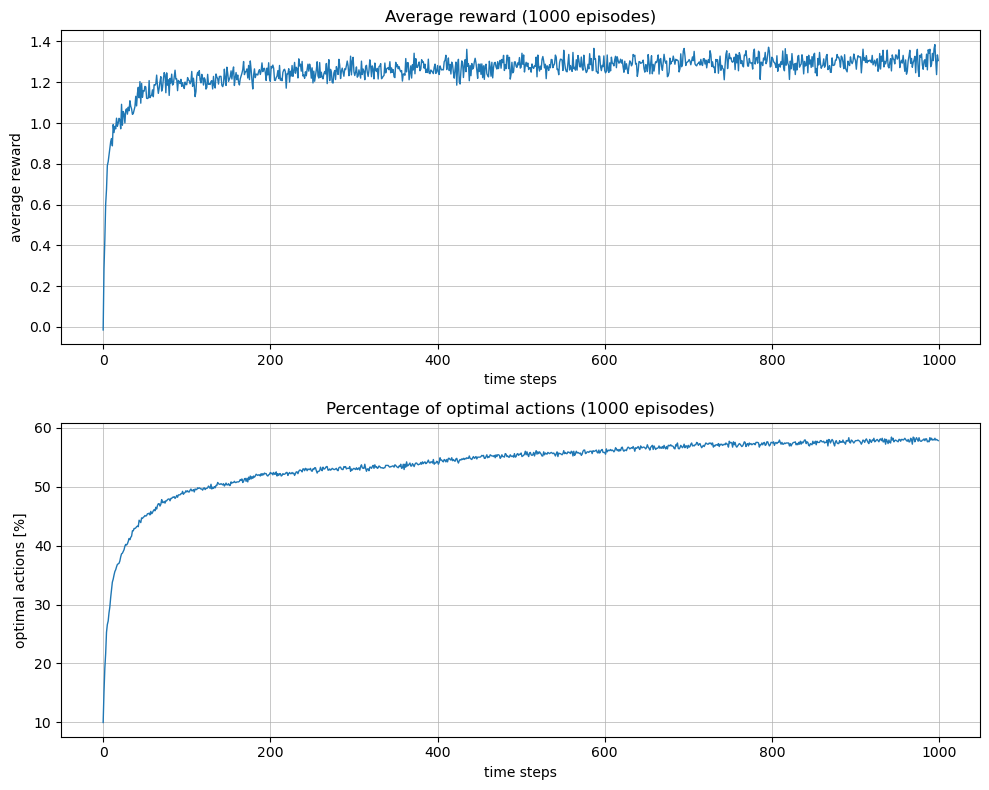

In [70]:
tau = 0.1
episodes = 1000
time_steps = 1000

optimal_actions = np.zeros((episodes, time_steps))
rewards = np.zeros((episodes, time_steps))

for episode in range(episodes):

    q_true = np.random.normal(0, 1, 10)
    optimal_actions[episode, :], rewards[episode, :] = softmax_multi_armed_bandit(tau, q_true)

optimal_actions_per = optimal_actions.mean(axis = 0)
avg_reward = rewards.mean(axis = 0)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
axes = ax.flatten()

axes[0].plot(np.arange(0, time_steps), avg_reward, linewidth=1)
axes[0].set_ylabel('average reward')
axes[0].set_xlabel('time steps')
axes[0].set_title(f'Average reward ({episodes} episodes)')
axes[0].grid(True, linewidth=0.5)

axes[1].plot(np.arange(0, time_steps), 100*optimal_actions_per, linewidth=1)
axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('time steps')
axes[1].set_title(f'Percentage of optimal actions ({episodes} episodes)')
axes[1].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

In [72]:
time_steps = 1000
episodes = 1000
tau_vect = [0.01, 0.2, 0.4, 0.6, 0.8, 1]

optimal_actions_per = np.zeros((len(tau_vect), time_steps))
avg_reward = np.zeros((len(tau_vect), time_steps))

for idx, tau in enumerate(tau_vect):
    
    optimal_actions = np.zeros((episodes, time_steps))
    rewards = np.zeros((episodes, time_steps))
    
    for episode in range(episodes): 
    
        q_true = np.random.normal(0, 1, 10)
        optimal_actions[episode, :], rewards[episode, :] = softmax_multi_armed_bandit(tau, q_true)

    optimal_actions_per[idx, :] = optimal_actions.mean(axis = 0)
    avg_reward[idx, :] = rewards.mean(axis = 0)

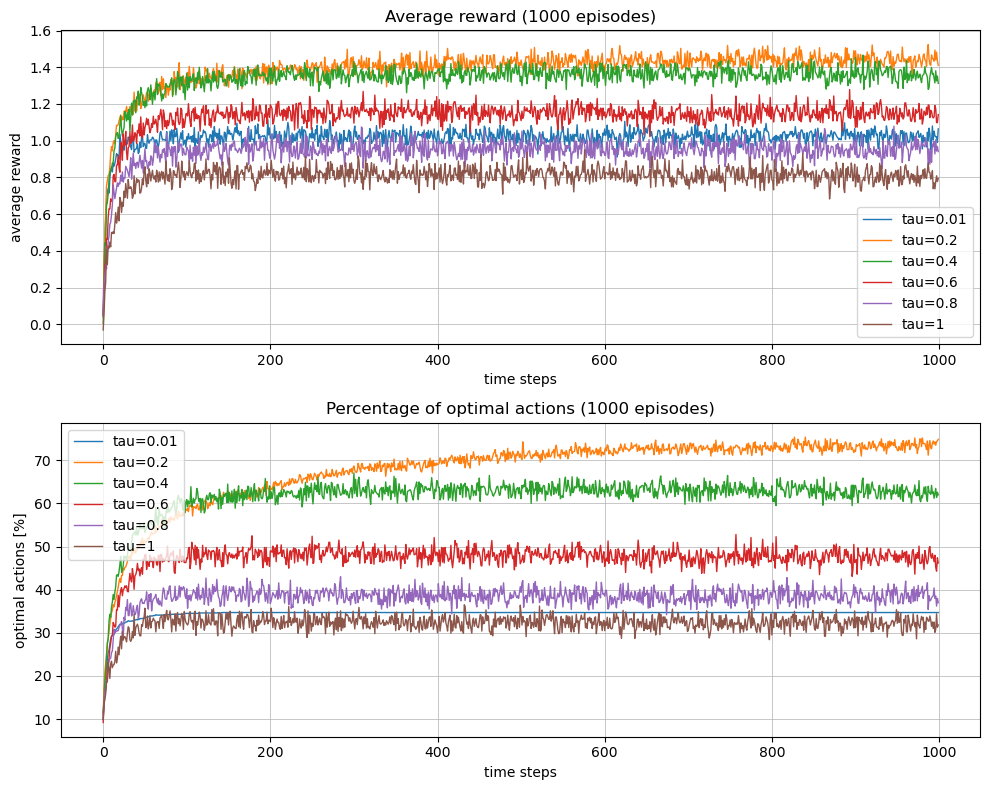

In [73]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
axes = ax.flatten()

axes[0].set_ylabel('average reward')
axes[0].set_xlabel('time steps')
axes[0].set_title(f'Average reward ({episodes} episodes)')
axes[0].grid(True, linewidth=0.5)

axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('time steps')
axes[1].set_title(f'Percentage of optimal actions ({episodes} episodes)')
axes[1].grid(True, linewidth=0.5)

auc_reward = np.zeros(len(tau_vect))
auc_optimal_actions = np.zeros(len(tau_vect))

for idx, tau in enumerate(tau_vect):

    axes[0].plot(np.arange(0, time_steps), avg_reward[idx, :], linewidth=1, label=f'tau={tau}')
    axes[1].plot(np.arange(0, time_steps), 100*optimal_actions_per[idx, :], linewidth=1, label=f'tau={tau}')

    auc_reward[idx] = avg_reward[idx, :].mean()
    auc_optimal_actions[idx] = 100*optimal_actions_per[idx, :].mean()    

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

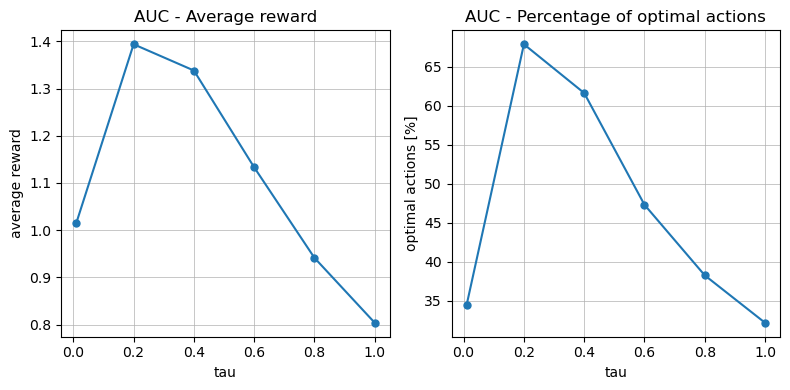

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
axes = ax.flatten()

axes[0].set_ylabel('average reward')
axes[0].set_xlabel('tau')
axes[0].set_title(f'AUC - Average reward')
axes[0].grid(True, linewidth=0.5)

axes[1].set_ylabel('optimal actions [%]')
axes[1].set_xlabel('tau')
axes[1].set_title(f'AUC - Percentage of optimal actions')
axes[1].grid(True, linewidth=0.5)

axes[0].plot(tau_vect, auc_reward, marker='o', markersize=5)
axes[1].plot(tau_vect, auc_optimal_actions, marker='o', markersize=5)

plt.tight_layout()
plt.show()

### 9 - mdp/g1 – Returns and episodes.
Suppose $\gamma := 1/2$ and the rewards $R_1 := 1, \; R_2: = -1, \; R_3 := 2, \; R_4 := -1$ and $R_5 := 2$ are recieved in episode with length T := 5. What are $G_0,...,G_5$?

Expected discounted return is given as:
\begin{equation*}
G_t = \sum_{k = t + 1}^T \gamma^{k - (t + 1)} R_k = R_{t + 1} + \gamma R_{t + 2} + ... + \gamma^{T - (t + 1)}R_T =  R_{t + 1} + \gamma G_{t + 1}
\end{equation*}
We need to calculate $G_0, ..., G_5$ going backwards with $G_5 = 0$ (terminal state):
\begin{align*}
G_5 &= 0 \\
G_4 &= R_5 + \gamma G_5 = 2 + 0 = 2 \\
G_3 &= R_4 + \gamma G_4 = -1 + \frac{1}{2} 2 = 0 \\
G_2 &= R_3 + \gamma G_3 = 2 + 0 = 2 \\
G_1 &= R_2 + \gamma G_2 = -1 + \frac{1}{2} 2 = 0 \\
G_0 &= R_1 + \gamma G_1 = 1 + 0 = 1
\end{align*}

### 10 - mdp/g2 – Returns and episodes.
Suppose $\gamma := 0.9$ and the reward sequence starts with $R_1 := -1$ and $R_2 := 2$ and is followed by an infinite sequence of 1s. What are $G_0, G_1, G_2$?

Firstly we have $R_3, R_4, R_5, ..., R_n = 1$;

\begin{equation*}
G_2 = R_3 + \gamma G_3 = R_3 + \gamma R_4 + \gamma^2 R_5 + \gamma^3 R_6 + ... = 1 + \gamma + \gamma^2 + \gamma^3 + ... = \sum_{k = 0}^\infty \gamma^k = \frac{1}{1 - \gamma} = 10
\end{equation*}

\begin{align*}
G_1 &= R_2 + \gamma G_2 = 2 + 0.9 * 10 = 11 \\
G_0 &= R_1 + \gamma G_1 = -1 + 0.9 * 11 = 8.9 
\end{align*}

### 11 - mdp/v – Equation for $v_\pi$.
Give an equation for $v_\pi$ in terms of $q_\pi$ and $\pi$.

For $v_\pi$ and $q_\pi$ we have:
\begin{align*}
    v_\pi(s) &= \mathbb{E}_\pi [G_t | S_t = s] \\
    q_\pi(s, a) &= \mathbb{E}_\pi [G_t | S_t = s, A_t = a]
\end{align*}

Also, $\pi(a|s) = \mathbb{P} [A_t = a | S_t = s]$

We can unroll expectation:
\begin{align*}
    \mathbb{E}_\pi [G_t | S_t = s] &= \sum_{a \in A_t} \mathbb{E}_\pi [G_t | S_t = s, A_t = a] \mathbb{P} [A_t = a | S_t = s] \\
                          v_\pi(s) &= \sum_{a \in A_t} q_\pi(s, a) \pi(a | s)
\end{align*}

### 12 - mdp/q – Equation for $q_\pi$.
Give an equation for $q_\pi$ in terms of $v_\pi$ and the four-argument $p$.

We have:
\begin{align*}
    q_\pi(s, a) &= \mathbb{E}_\pi [G_t | S_t = s, A_t = a]
\end{align*}
Unrolling $G_t$:
\begin{align*}
    G_t &= R_{t + 1} + \gamma G_{t + 1} \\
    q_\pi(s, a) &= \mathbb{E}_\pi [R_{t + 1} + \gamma G_{t + 1} | S_t = s, A_t = a]
\end{align*}
Given:
\begin{align*}
    v_\pi(s') &= \mathbb{E}_\pi [G_{t+1} | S_t = s']
\end{align*}
and following law of total expectation:
\begin{align*}
\mathbb{E} [X] = \mathbb{E}[\mathbb{E}[X | Y]]
\end{align*}
We have:
\begin{align*}
q_\pi(s, a) = \mathbb{E}_\pi [R_{t + 1} + \gamma v_\pi(s') | S_t = s, A_t = a]
\end{align*}

Finally we can add $s'$ and $r$:
\begin{align*}
    q_\pi(s, a) = \sum_{s', r} p(s', r | a, s) [r + \gamma v_\pi(s')]
\end{align*}


### 13 - mdp/ret – Change of return.
In episodic tasks and in continuing tasks, how does the return $G_t$ change if a constant $c$ is added to all rewards $R_t$?

Like in tasks 9 and 10, we have:

\begin{equation*}
    G_t = \sum_{k = t + 1}^T \gamma^{k - (t + 1)} R_k = R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + ... + \gamma^{T - (t + 1)} R_T 
\end{equation*}

For episodic tasks, if we want to add constant $c$ for all rewards $R_t$:
\begin{align*}
    G_t' = \sum_{k = t + 1}^T \gamma^{k - (t + 1)} (R_{k} + c)  &= \sum_{k = t + 1}^T \gamma^{k - (t + 1)} R_{k} + \sum_{k = t + 1}^T \gamma^{k - (t + 1)} c \\
        &= G_t + c \sum_{k = t + 1}^T \gamma^{k - (t + 1)} \\
        &= G_t + c \sum_{k = 0}^{T - (t + 1)} \gamma^k \\
        &= G_t + c \frac{1 - \gamma^{T - t}}{1 - \gamma}
\end{align*}
which is given for $0 < \gamma < 1$, for $\gamma = 1$ we have sum of constant $c$ iterating $T-t$ times:
\begin{equation*}
    G_t' = G_t + c(T - t)
\end{equation*}

For continuing tasks:
\begin{align*}
G_t = R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + ...
\end{align*}
With addition of $c$:
\begin{align*}
G_t' = (R_{t + 1} + c) + \gamma (R_{t + 2} + c) + \gamma^2 (R_{t + 3} + c) + ... &= G_t + \sum_{k = t + 1}^\infty \gamma^{k + (t - 1)} c \\
                        &= G_t + c\sum_{k = 0}^\infty \gamma^{k} \\
                        &= G_t + c\frac{1}{1 - \gamma}
\end{align*}

### 14 - mdp/bellman/qpi – Bellman equation for $q_\pi$.
Analogous to the derivation of the Bellman equation for $v_\pi$, derive the Bellman equation for $q_\pi$.

We can use results from tasks 11 and 12:
\begin{align*}
    v_\pi(s) &= \sum_{a \in A_t} q_\pi(s, a) \pi(a | s) \\
    q_\pi(s, a) &= \sum_{s', r} p(s', r | a, s) [r + \gamma v_\pi(s')]
\end{align*}

Therefore,
\begin{equation*}
    q_\pi(s, a) = \sum_{s', r} p(s', r | a, s) [r + \gamma \sum_{a'} q_\pi(s', a') \pi(a' | s')]
\end{equation*}

### 15 - mdp/vstar – Equation for $v_*$.
Give an equation for $v_*$ in terms of $q_*$.

We have:

\begin{align*}
    v_*(s) &= \max_\pi \; v_\pi(s) \\
    q_*(s, a) &= \max_\pi \; q_\pi(s, a)
\end{align*}
Therefore:
\begin{equation*}
    v_*(s) = \max_a\; q_*(s, a)
\end{equation*}

### 16 - mdp/qstar – Equation for $q_*$.
Give an equation for $q_*$ in terms of $v_*$ and the four-argument $p$.

Following optimal policy $\pi_*$:

\begin{equation*}
    q_*(s, a) = \sum_{s', r} p(s', r | a, s) [r + \gamma v_*(s')]
\end{equation*}


### 17 - mdp/pistar/vstar – Equation for $\pi_*$.
Give an equation for $\pi_*$ in terms of $q_*$.

\begin{equation*}
\pi_*(a|s) = \begin{cases}
    1 & \text{if} \; a = \argmax_a q_*(a|s)\\
    0 & \text{otherwise}
    \end{cases}, \; \forall s \in S
\end{equation*}

*Note from live lecture:*

For stochastic policies:

\begin{equation*}
\pi_*(a|s) = \begin{cases}
    \frac{1}{|A'|} & \text{if} \; q \in \argmax_{a' \in A} q_x(s, a') \\ 
    0 & \text{otherwise} \end{cases}
\end{equation*}

### 18 - mdp/pistar/qstar – Equation for $\pi_*$.
Give an equation for $\pi_*$ in terms of $v_*$ and the four-argument $p$.

\begin{equation*}
\pi_*(a|s) = \begin{cases}
    1 & \text{if} \; a = \argmax_a \sum_{s', r} p(s', r | a, s) [r + \gamma v_*(s')]\\
    0 & \text{otherwise}
    \end{cases}, \; \forall s \in S
\end{equation*}